# Import

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load and Split the data

In [2]:
# load the fashion mnist data
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# load the training, test split of Fashion MNIST data
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Check out the raw and sample images from the dataset

In [4]:
import matplotlib.pyplot as plt

LABEL: 9

 IMAGE PIXEL ARRAY: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   

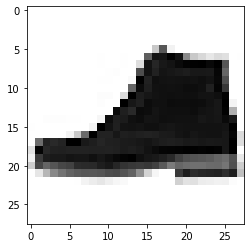

In [5]:
# index of the image that we want to see (0 - 59999)
index = 42

# set the number of characters per row when printing
np.set_printoptions(linewidth=320)

# print label and image
print(f'LABEL: {training_labels[index]}')
print(f'\n IMAGE PIXEL ARRAY: \n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap='Greys');

# Normalize the data

In [6]:
# normalize the pixel values of training and test images
training_images = training_images/255.0 
test_images = test_images/255.0

# Build Classification Model

In [7]:
# build classifiction model
model = Sequential()

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

In [11]:
# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# fit the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5010 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3123 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2944 - accuracy: 0.8923


# Evaluate the Model

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8691


[0.36003434658050537, 0.8690999746322632]

-----------

# Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

In [15]:
classifications = model.predict(test_images)

print(classifications[0])

[5.6489607e-06 1.8950188e-07 9.3347290e-07 1.7457431e-07 3.5825331e-06 9.3160579e-03 1.9926511e-06 7.4851654e-02 1.3901133e-04 9.1568083e-01]


In [16]:
print(test_labels[0])

9


---------

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary>Click for Answer</summary>
<p>

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

</p>
</details>

--------

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list

<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

---------

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [10]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# model building
model = Sequential()

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
          
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy')

In [21]:
# train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1872
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0750
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0488
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0348
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0262


In [22]:
# evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0807


0.08065488189458847

In [16]:
# classification predictions
classifications = model.predict(X_test)

In [19]:
# get the image of specific image and compare with actual result
np.argmax(classifications[0])

7

In [18]:
y_test[0]

7

Finding: Seem like our model prediction is correct.

### Comparing Dense layer with 1024 units (A Model)  to Dense layer with 512 units (B Model)
+ Training Time - A Model : 21s 11ms, B Model: 12s 6ms
+ Loss - A Model: 0.0262 , B Model: 0.0280
+ Evaluation Result - A Model: 0.08065488189458847, B Model: 0.06428871

+ Model A with 1024 units is better in accuracy than Model B with 512 units.
+ However as there are more neurons in Model A, it takes longer to train.

----------

### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>

--------

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

</p>
</details>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# model building
model = Sequential()

# model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
          
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy')

In [4]:
# train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 919, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\losses.py", line 1863, in sparse_categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\backend.py", line 5203, in sparse_categorical_crossentropy
        labels=target, logits=output)

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


--------

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [5]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# model building
model = Sequential()

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=9, activation='softmax'))
          
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy')

In [6]:
# train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
   1/1875 [..............................] - ETA: 33:19 - loss: 2.1546

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\kernelapp.py", line 707, in start
      self.io_loop.start()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\kernelbase.py", line 398, in dispatch_shell
      await result
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\IPython\core\interactiveshell.py", line 2958, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\IPython\core\interactiveshell.py", line 3003, in _run_cell
      return runner(coro)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\IPython\core\interactiveshell.py", line 3229, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\IPython\core\interactiveshell.py", line 3524, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Phone Thiri Yadana\AppData\Local\Temp\ipykernel_6100\1450775186.py", line 2, in <module>
      model.fit(X_train, y_train, epochs=5)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\training.py", line 919, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\losses.py", line 1863, in sparse_categorical_crossentropy
      y_true, y_pred, from_logits=from_logits, axis=axis)
    File "C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\keras\backend.py", line 5203, in sparse_categorical_crossentropy
      labels=target, logits=output)
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 9).  Label values: 8 5 2 3 7 0 3 5 5 7 5 5 4 4 6 5 0 9 1 1 0 2 9 7 5 8 7 7 5 0 6 6
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_727]

----------

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

<details><summary>Click for Answer</summary>
<p>

#### Answer 
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

</p>
</details>

In [9]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2018
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0807
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0521
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0366
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0704
[1.6653973e-07 4.7061050e-10 1.8494923e-06 2.8102673e-04 3.0803502e-11
 1.8321081e-09 8.4223888e-14 9.9944633e-01 5.5129451e-08 2.7052380e-04]
7


--------

### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [10]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2602
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1131
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0157
Epoch 11/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132
Epoch 12/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106
E

In [11]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1142
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0143
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0123
E

------

### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [12]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Data Normalization
# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.6834
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3412
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3076
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2603
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3004
[3.6527288e-31 1.3025179e-19 1.7534035e-13 4.4942086e-13 9.4632839e-26
 1.0991421e-19 0.0000000e+00 1.0000000e+00 1.8176640e-17 1.8420531e-17]
7


Findings: Without normalizing the data, it takes more time to train the data.

--------

### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.8321
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4705 - accuracy: 0.8323
